In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [91]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
    ])

transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)


In [92]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))


tensor(0.) tensor(1.)


In [93]:
# repeatedly reduce the size
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Input [-1, +1] -> use nn.Tanh

In [94]:
model = Autoencoder_Linear()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

In [105]:

num_epochs = 1
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        enco = model.encoder(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon, enco))

Epoch:1, Loss:0.0145


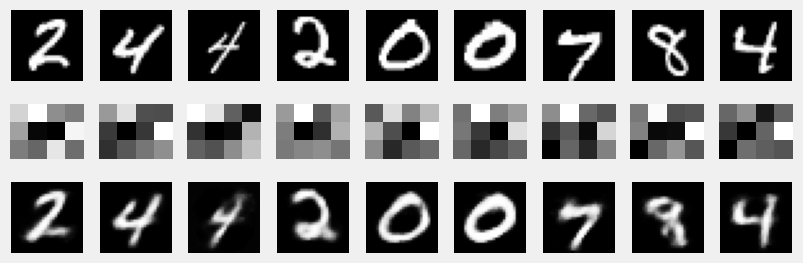

In [117]:
for k in range(0, num_epochs):
    plt.figure(figsize=(9, 3))
    plt.gray()    
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    enco = outputs[k][3].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(3, 9, i+1)
        item = item.reshape(-1, 28,28)
        plt.axis('off')
        # item: 1, 28, 28
        plt.imshow(item[0])

    for i, item in enumerate(enco):
        if i >= 9: break
        plt.subplot(3, 9, 9 + i+1) # row_length + i + 1
        item = item.reshape(-1, 3,4) # -> use for Autoencoder_Linear
        plt.axis('off')
        # item: 1, 28, 28
        plt.imshow(item[0])
    
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(3, 9, 18 +i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        plt.axis('off')
        # item: 1, 28, 28
        plt.imshow(item[0])

